In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle as pkl


# Image Preprocessing

accessing the sample images and resize the our designer photos accordingly

In [2]:
from PIL import Image
from google.cloud import storage

In [3]:
#image=Image.open('sample_images/18753.jpg') is a good one to look at
#load sample image
image=Image.open('designer_images/image_1.jpg')


In [4]:
data = np.asarray(image, dtype="int32" )

In [5]:
data.shape[:2]

(900, 900)

In [6]:
#load designer image

image2 = Image.open('designer_images/image_10.jpg').resize((60,80))

In [7]:
data2 = np.asarray(image2, dtype="int32" )

In [8]:
data2.shape 

(80, 60, 3)

## Designer images 

In [9]:
# bulk resizing designer images

def resizing(url):
    image=Image.open(url).resize((60,80))
    data=np.asarray(image, dtype="int32")
    return data 

In [10]:
PATH=os.getcwd()

In [11]:
DESIGNER_PATH=os.path.join(PATH,'designer_images')


In [12]:
designer_image_files=os.listdir(DESIGNER_PATH)
designer_image_files[0]

'image_15.jpg'

In [13]:
#bulk preprecessing designer images as numpy arrays

data=[]
for file in designer_image_files:
    url=os.path.join(DESIGNER_PATH, file)
    data.append(resizing(url))
    

In [14]:
designer_data=np.array(data)
designer_data.shape

(20, 80, 60, 3)

## Sample Images

In [15]:
!LS

/bin/bash: LS: command not found


In [16]:
SAMPLE_PATH=os.path.join(PATH,'sample_images')
SAMPLE_PATH

'/home/jupyter/sample_images'

In [17]:
sample_files=os.listdir(SAMPLE_PATH)
sample_files[0]

'52045.jpg'

In [18]:
#loading sample images
def load_sample_images(url):
    image=Image.open(url)
    data=np.asarray(image, dtype="int32")
    return data 

In [19]:
# #convert to np array
# sample_data=[]

# for file in sample_files:
#     url=os.path.join(SAMPLE_PATH, file)
#     array=resizing(url)
#     if array.shape == data2.shape: #specifying shape to avoid faulty data
#         sample_data.append(array)

In [20]:
# sample_data=np.array(sample_data)
# sample_data.shape

In [21]:
# with open('sample_data.pkl','wb') as handler:
#     pkl.dump(sample_data, handler)

In [22]:
with open('sample_data.pkl','rb') as handler:
    sample_data=pkl.load(handler)

In [23]:
sample_data=sample_data.astype('float32')/255

In [24]:
sample_data[0].dtype

dtype('float32')

# Autoencoder

## Encoder

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2022-12-31 01:29:00.122852: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-31 01:29:00.579149: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-31 01:29:02.353069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-31 01:29:02.353496: W tensorflow/strea

In [26]:
def build_encoder(latent_dimension):
    encoder=Sequential()
    
    encoder.add(Conv2D(8,(3,3), input_shape=(80,60,3), activation='relu'))
    encoder.add(MaxPooling2D(2))
    
    encoder.add(Conv2D(16, (3, 3), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(32, (3, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))    
    
    encoder.add(Flatten())
    encoder.add(Dense(latent_dimension, activation='sigmoid'))
    
    return encoder

In [27]:
encoder=build_encoder(50)

2022-12-31 01:29:10.159966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 01:29:10.309002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 01:29:10.310999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 01:29:10.313588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [28]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 58, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 29, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 27, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 12, 32)        3104      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 6, 32)         0

In [29]:
designer_latent=encoder.predict(designer_data)

2022-12-31 01:29:12.384841: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200


1/1 [==============================] - 2s 2s/step


In [30]:
designer_latent.shape

(20, 50)

In [31]:
sample_latent=encoder.predict(sample_data)

2022-12-31 01:29:13.995549: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2534976000 exceeds 10% of free system memory.
2022-12-31 01:29:15.457631: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2534976000 exceeds 10% of free system memory.


1376/1376 [==============================] - 4s 3ms/step


In [32]:
sample_latent.shape

(44010, 50)

In [33]:
from tensorflow.keras.layers import Reshape, Conv2DTranspose

In [34]:
(np.array([80, 60])/2)/2

array([20., 15.])

In [56]:
def build_decoder(latent_dimension):
    decoder=Sequential()
    
    decoder.add(Dense(20*15*10, activation='tanh', input_shape=(latent_dimension,)))
    
    decoder.add(Reshape((20,15,10)))

    decoder.add(Conv2DTranspose(3, (2, 2), strides=2, padding='same', activation='relu'))

    decoder.add(Conv2DTranspose(3, (2, 2), strides=2, padding='same', activation='selu'))
    
    
    return decoder

In [57]:
decoder=build_decoder(50)

In [58]:
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3000)              153000    
                                                                 
 reshape_1 (Reshape)         (None, 20, 15, 10)        0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 40, 30, 3)        123       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 80, 60, 3)        39        
 ranspose)                                                       
                                                                 
Total params: 153,162
Trainable params: 153,162
Non-trainable params: 0
_________________________________________________________________


In [59]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
def build_model(encoder, decoder):
    inp=Input((80,60,3))
    encoded=encoder(inp)
    decoded=decoder(encoded)
    autoencoder=Model(inp,decoded)
    
    autoencoder.compile(loss='mse',
              optimizer='adam')
    return autoencoder

In [61]:
autoencoder=build_model(encoder, decoder)

In [62]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80, 60, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 50)                81346     
                                                                 
 sequential_2 (Sequential)   (None, 80, 60, 3)         153162    
                                                                 
Total params: 234,508
Trainable params: 234,508
Non-trainable params: 0
_________________________________________________________________


In [63]:
sample_length=(sample_data.shape)[0]

In [64]:

chunk_range=np.arange(0,sample_length,5000)
chunk_range


array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])

In [65]:
chunk_range

array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])

In [66]:
k=len(chunk_range)-1
k

8

In [52]:
#bulk training data

history=[]

for i in range(len(chunk_range)):
    if i==len(chunk_range)-1:
        print("[",chunk_range[i],":]")
        history.append(
                autoencoder.fit(
                sample_data[chunk_range[i]:],
                sample_data[chunk_range[i]:], 
                epochs=100,
                validation_split=0.2,
                callbacks=EarlyStopping(patience=5, restore_best_weights=True)))
        
    elif i>=2:
        print("[",chunk_range[i-1],":",chunk_range[i],"]")
        history.append(
                autoencoder.fit(
                sample_data[chunk_range[i-1]:chunk_range[i]],
                sample_data[chunk_range[i-1]:chunk_range[i]], 
                epochs=100,
                validation_split=0.2,
                callbacks=EarlyStopping(patience=10, restore_best_weights=True)))
    elif i==1:
        print("[",chunk_range[i-1],":",chunk_range[i],"]")
        history.append(
                autoencoder.fit(
                sample_data[chunk_range[i-1]:chunk_range[i]],
                sample_data[chunk_range[i-1]:chunk_range[i]], 
                epochs=15,
                validation_split=0.2,
                callbacks=EarlyStopping(patience=5, restore_best_weights=True)))

[ 0 : 5000 ]
Epoch 1/15
125/125 [==============================] - 1s 9ms/step - loss: 0.1148 - val_loss: 0.1144
Epoch 2/15
125/125 [==============================] - 1s 6ms/step - loss: 0.1148 - val_loss: 0.1144
Epoch 3/15
125/125 [==============================] - 1s 6ms/step - loss: 0.1148 - val_loss: 0.1145
Epoch 4/15
125/125 [==============================] - 1s 6ms/step - loss: 0.1148 - val_loss: 0.1144
Epoch 5/15
125/125 [==============================] - 1s 6ms/step - loss: 0.1148 - val_loss: 0.1144
Epoch 6/15
125/125 [==============================] - 1s 9ms/step - loss: 0.1148 - val_loss: 0.1144
Epoch 7/15
125/125 [==============================] - 1s 7ms/step - loss: 0.1148 - val_loss: 0.1144
Epoch 8/15
125/125 [==============================] - 1s 6ms/step - loss: 0.1147 - val_loss: 0.1144
Epoch 9/15
125/125 [==============================] - 1s 6ms/step - loss: 0.1147 - val_loss: 0.1144
Epoch 10/15
125/125 [==============================] - 1s 6ms/step - loss: 0.1148 - val

In [48]:
sample_data[40000:].shape

(4010, 80, 60, 3)

In [49]:
len(chunk_range)

9

In [50]:
chunk_range[len(chunk_range)-1]

40000

In [ ]:
# history=autoencoder.fit(sample_data[:5000],
#                 sample_data[:5000], 
#                 epochs=100,
#                 validation_split=0.2,
#                 callbacks=EarlyStopping(patience=5, restore_best_weights=True))

In [ ]:
# autoencoder.save_weights('checkpoints/checkpoint1')

In [ ]:
autoencoder.summary()

In [ ]:
# autoencoder.load_weights('checkpoints/checkpoint1')

In [53]:
prediction=autoencoder.predict(sample_data[:5000],  verbose=0)


In [ ]:
(prediction[4]==prediction[100]).sum()

In [ ]:
prediction[0].shape

In [ ]:
80*60*3

In [54]:
prediction[0]

array([[[0.99551594, 0.9910356 , 0.9907406 ],
        [0.99701834, 0.992059  , 0.993318  ],
        [0.9947821 , 0.9897516 , 0.9893744 ],
        ...,
        [0.99726105, 0.9921969 , 0.9931868 ],
        [0.99513125, 0.9901886 , 0.9898518 ],
        [0.99473965, 0.98931026, 0.99005574]],

       [[0.9968215 , 0.99093807, 0.9901285 ],
        [0.99732745, 0.        , 0.99117607],
        [0.9953457 , 0.9893302 , 0.98861754],
        ...,
        [0.99731886, 0.        , 0.9911996 ],
        [0.9957607 , 0.98978376, 0.9891182 ],
        [0.99451566, 0.        , 0.9882594 ]],

       [[0.9948678 , 0.9912447 , 0.9912316 ],
        [0.9950564 , 0.9903641 , 0.9926591 ],
        [0.997326  , 0.9924749 , 0.9922874 ],
        ...,
        [0.9955454 , 0.99061716, 0.99229765],
        [0.99753785, 0.9920471 , 0.9916944 ],
        [0.9936302 , 0.9876456 , 0.98748684]],

       ...,

       [[0.997177  , 0.991356  , 0.9906133 ],
        [0.99740136, 0.        , 0.99123716],
        [0.9955932 , 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


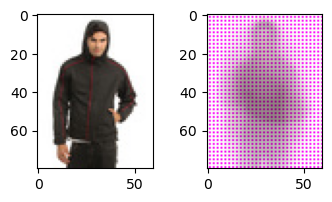

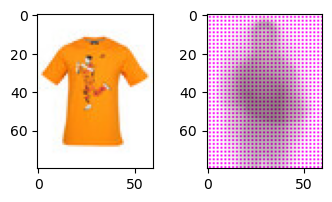

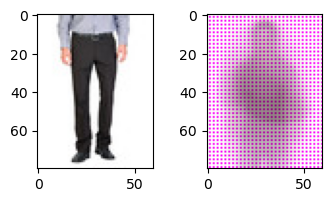

In [55]:
import matplotlib.pyplot as plt
for i in range(3):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(4,2))
    ax1.imshow(sample_data[i])
    ax2.imshow(prediction[i])